## Connecting the dataset

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df= pd.read_csv('C:/Pythin/airbnb/raw/airbnb_london_listing.csv') #import the dataset

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df=df.iloc[: , 1:] #drop the first column 
df.replace("NaN", np.nan, inplace=True)
df

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15896822,20170304065726,69018624,Dafina,2016-04-26,100%,NaN,f,RB of Kingston upon Thames,1.0,...,10.0,f,NaN,NaN,f,flexible,f,f,1,0.32
1,4836957,20170304065726,18154504,Anas,2014-07-15,100%,NaN,f,RB of Kingston upon Thames,1.0,...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.67
2,13355982,20170304065726,75741819,Maria,2016-06-04,NaN,NaN,f,RB of Kingston upon Thames,1.0,...,8.0,f,NaN,NaN,f,flexible,f,f,1,0.25
3,13472704,20170304065726,77078182,Hannah,2016-06-11,NaN,NaN,f,RB of Kingston upon Thames,1.0,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
4,17430865,20170304065726,113972982,Jung Kyung,2017-01-30,100%,NaN,f,RB of Kingston upon Thames,1.0,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53899,14565735,20170304065726,59310710,Angelos,2016-02-18,81%,NaN,f,Hammersmith,22.0,...,6.0,f,NaN,NaN,f,strict,f,f,21,0.17
53900,7312985,20170304065726,38314213,Paul,2015-07-13,NaN,NaN,f,NaN,1.0,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
53901,17248546,20170304065726,29211630,Junior,2015-03-12,75%,NaN,f,Knightsbridge,3.0,...,NaN,f,NaN,NaN,f,flexible,f,f,3,NaN
53902,17184388,20170304065726,115648419,Dee,2017-02-09,NaN,NaN,f,LB of Hounslow,1.0,...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN


## Dataset analysis

In [4]:
df.dtypes

id                                    int64
scrape_id                             int64
host_id                               int64
host_name                            object
host_since                           object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 72, dtype: object

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53904 entries, 0 to 53903
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                53904 non-null  int64  
 1   scrape_id                         53904 non-null  int64  
 2   host_id                           53904 non-null  int64  
 3   host_name                         53895 non-null  object 
 4   host_since                        53895 non-null  object 
 5   host_response_rate                40524 non-null  object 
 6   host_acceptance_rate              0 non-null      float64
 7   host_is_superhost                 53895 non-null  object 
 8   host_neighbourhood                40797 non-null  object 
 9   host_listings_count               53895 non-null  float64
 10  host_total_listings_count         53895 non-null  float64
 11  host_verifications                53904 non-null  object 
 12  host

In [6]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['calendar_last_scraped']=pd.to_datetime(df['calendar_last_scraped'])
df['first_review']=pd.to_datetime(df['first_review'])
df['last_review']=pd.to_datetime(df['last_review'])

In [7]:
columns_to_convert = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

for col in columns_to_convert:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float) 

In [8]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53904 entries, 0 to 53903
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                53904 non-null  int64         
 1   scrape_id                         53904 non-null  int64         
 2   host_id                           53904 non-null  int64         
 3   host_name                         53895 non-null  object        
 4   host_since                        53895 non-null  datetime64[ns]
 5   host_response_rate                40524 non-null  float64       
 6   host_acceptance_rate              0 non-null      float64       
 7   host_is_superhost                 53895 non-null  object        
 8   host_neighbourhood                40797 non-null  object        
 9   host_listings_count               53895 non-null  float64       
 10  host_total_listings_count         53895 non-nu

In [10]:
columns_to_drop = ['license', 'jurisdiction_names', 'monthly_price', 'weekly_price','security_deposit','has_availability', 'square_feet', 'neighbourhood_group_cleansed', 'host_acceptance_rate']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df=df.dropna()
df

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
16,14296637,20170304065726,34769575,Patrick,2015-06-01,1.0,f,RB of Kingston upon Thames,2.0,2.0,...,10.0,10.0,10.0,f,f,strict,f,f,2,0.34
30,6179409,20170304065726,32033043,Charlie And Lee,2015-04-27,1.0,t,RB of Kingston upon Thames,1.0,1.0,...,10.0,10.0,10.0,f,t,moderate,f,f,1,1.18
53,9964915,20170304065726,51206977,Fatoum,2015-12-13,1.0,f,RB of Kingston upon Thames,3.0,3.0,...,10.0,10.0,10.0,f,t,strict,f,f,3,1.80
60,5902097,20170304065726,21799011,Chris,2014-09-26,1.0,f,RB of Kingston upon Thames,2.0,2.0,...,10.0,10.0,10.0,f,f,moderate,f,f,2,0.93
94,15232397,20170304065726,91928628,Felix,2016-08-26,1.0,f,RB of Kingston upon Thames,1.0,1.0,...,10.0,10.0,10.0,f,f,strict,f,f,1,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53799,15641857,20170304065726,84147567,Clarabelle,2016-07-16,1.0,f,LB of Barking and Dagenham,2.0,2.0,...,10.0,8.0,10.0,f,f,flexible,f,f,2,0.26
53825,16467679,20170304065726,14563708,Mariane,2014-04-21,1.0,f,LB of Barking and Dagenham,2.0,2.0,...,9.0,6.0,7.0,f,t,strict,f,f,2,1.41
53831,16723474,20170304065726,107178053,Maria,2016-12-13,0.6,f,LB of Barking and Dagenham,2.0,2.0,...,10.0,10.0,10.0,f,t,flexible,f,f,1,1.00
53865,16936213,20170304065726,9418622,Lenka,2013-10-14,1.0,f,LB of Barking and Dagenham,9.0,9.0,...,10.0,10.0,10.0,f,f,flexible,f,f,8,1.00


## Data for cancellation policy (loops, dictionary, sets, lists)

Let's check what type of information we have for example in the column cancellation_policy for the airbnb places in London

### Lists:

In [12]:
cancellation_policy = list(df["cancellation_policy"])
cancellation_policy

['strict',
 'moderate',
 'strict',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'flexible',
 'strict',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'strict',
 'strict',
 'strict',
 'moderate',
 'flexible',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'moderate',
 'flexible',
 'strict',
 'flexible',
 'strict',
 'flexible',
 'moderate',
 'strict',
 'strict',
 'flexible',
 'strict',
 'strict',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'strict',
 'strict',
 'strict',
 'strict',
 'moderate',
 'flexible',
 'strict',
 'strict',
 'flexible',
 'flexible',
 'moderate',
 'strict',
 'strict',
 'strict',
 'strict',
 'strict',
 'strict',
 'moderate',
 'flexible',
 'moderate',
 'strict',
 'strict',
 'moderate',
 'strict',
 'moderate',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'moderate',
 'moderate',
 'strict',
 'flexible',
 'strict',
 'moderate',
 'strict',
 'strict',
 'flexible',
 'strict',
 'strict',
 'strict',
 'flexible',
 'strict',
 'flexible',
 'moderate',
 'moderate'

### Sets:

In [13]:
cp_set= set(df["cancellation_policy"])
cp_set

{'flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60'}

### Dictionaries:

In [14]:
cancellation_policy_1 = dict.fromkeys(cp_set,0)
cancellation_policy_1

{'flexible': 0,
 'super_strict_30': 0,
 'moderate': 0,
 'strict': 0,
 'super_strict_60': 0}

### Loop to count for ammount of cancellation policy types in the list

In [15]:
for i in cancellation_policy_1:
    count = 0
    for j in cancellation_policy:
        if j == i:
            count+=1
    cancellation_policy_1[i]=count 
cancellation_policy_1

{'flexible': 1087,
 'super_strict_30': 1,
 'moderate': 1841,
 'strict': 3249,
 'super_strict_60': 1}

## Summary statistic 

In [16]:
round(df.describe(),2)

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,6179.00,6.179000e+03,6.179000e+03,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,...,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00,6179.00
mean,11891477.17,2.017030e+13,3.611881e+07,0.95,11.21,11.21,51.51,-0.13,3.46,1.29,...,16.19,92.50,9.47,9.32,9.64,9.67,9.43,9.27,10.38,1.68
std,5284151.89,1.710000e+00,3.482014e+07,0.14,58.67,58.67,0.04,0.08,1.93,0.56,...,28.56,9.49,0.97,1.08,0.84,0.84,0.84,0.98,56.18,1.53
min,13913.00,2.017030e+13,2.010000e+03,0.00,0.00,0.00,51.33,-0.47,1.00,0.00,...,1.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.01
25%,7964438.00,2.017030e+13,6.603004e+06,0.99,1.00,1.00,51.49,-0.19,2.00,1.00,...,2.00,90.00,9.00,9.00,10.00,10.00,9.00,9.00,1.00,0.57
50%,14553116.00,2.017030e+13,2.344890e+07,1.00,2.00,2.00,51.51,-0.13,3.00,1.00,...,6.00,95.00,10.00,10.00,10.00,10.00,10.00,9.00,1.00,1.12
75%,15811353.00,2.017030e+13,5.954322e+07,1.00,5.00,5.00,51.53,-0.08,4.00,1.50,...,17.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00,2.31
max,17431497.00,2.017030e+13,1.177591e+08,1.00,735.00,735.00,51.67,0.24,16.00,8.00,...,327.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,711.00,11.58


## Graph

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

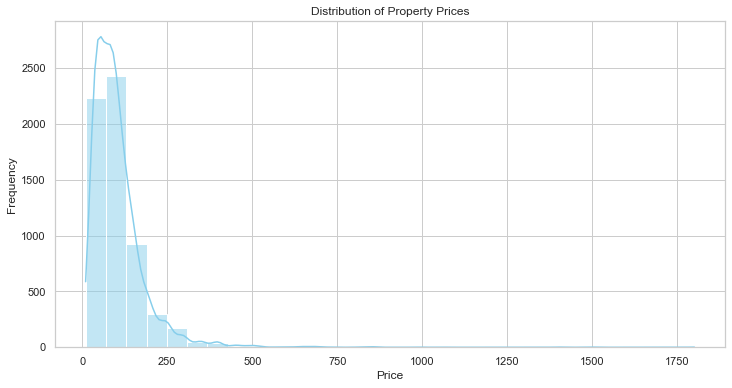

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

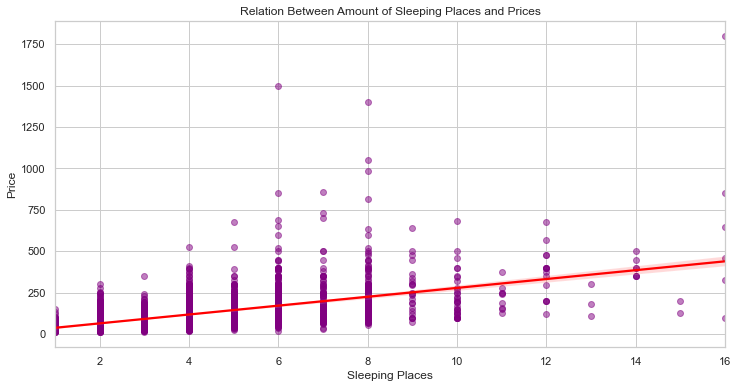

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.regplot(x='accommodates', y='price', data=df, color='purple', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.title("Relation Between Amount of Sleeping Places and Prices")
plt.xlabel("Sleeping Places")
plt.ylabel("Price")

# plot the graph
plt.show()

It seems that price a little bit over 1750 is an outlier, so let's clean the data from this types of outliers and plot graphs again. In my approach I just changed the values that are greater than 1250 to NaN values.

In [20]:
df['price'] = df['price'].where(df['price'] < 1250, float('nan'))
df

<ipython-input-20-bc722a0c3e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].where(df['price'] < 1250, float('nan'))


,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
16,14296637,20170304065726,34769575,Patrick,2015-06-01,1.0,f,RB of Kingston upon Thames,2.0,2.0,...,10.0,10.0,10.0,f,f,strict,f,f,2,0.34
30,6179409,20170304065726,32033043,Charlie And Lee,2015-04-27,1.0,t,RB of Kingston upon Thames,1.0,1.0,...,10.0,10.0,10.0,f,t,moderate,f,f,1,1.18
53,9964915,20170304065726,51206977,Fatoum,2015-12-13,1.0,f,RB of Kingston upon Thames,3.0,3.0,...,10.0,10.0,10.0,f,t,strict,f,f,3,1.80
60,5902097,20170304065726,21799011,Chris,2014-09-26,1.0,f,RB of Kingston upon Thames,2.0,2.0,...,10.0,10.0,10.0,f,f,moderate,f,f,2,0.93
94,15232397,20170304065726,91928628,Felix,2016-08-26,1.0,f,RB of Kingston upon Thames,1.0,1.0,...,10.0,10.0,10.0,f,f,strict,f,f,1,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53799,15641857,20170304065726,84147567,Clarabelle,2016-07-16,1.0,f,LB of Barking and Dagenham,2.0,2.0,...,10.0,8.0,10.0,f,f,flexible,f,f,2,0.26
53825,16467679,20170304065726,14563708,Mariane,2014-04-21,1.0,f,LB of Barking and Dagenham,2.0,2.0,...,9.0,6.0,7.0,f,t,strict,f,f,2,1.41
53831,16723474,20170304065726,107178053,Maria,2016-12-13,0.6,f,LB of Barking and Dagenham,2.0,2.0,...,10.0,10.0,10.0,f,t,flexible,f,f,1,1.00
53865,16936213,20170304065726,9418622,Lenka,2013-10-14,1.0,f,LB of Barking and Dagenham,9.0,9.0,...,10.0,10.0,10.0,f,f,flexible,f,f,8,1.00


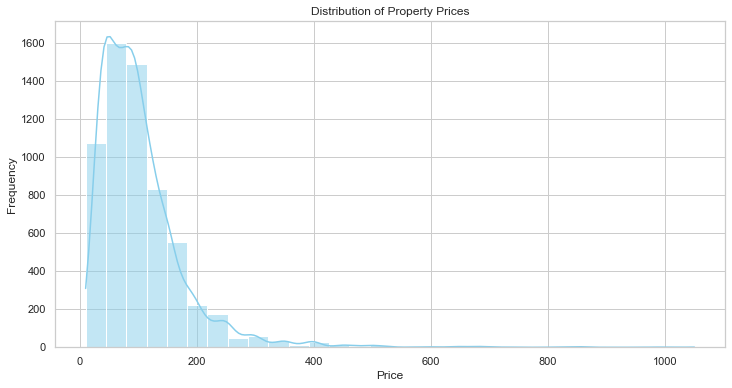

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

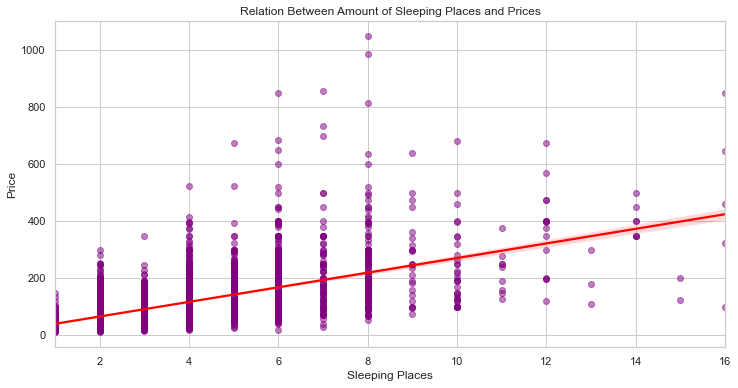

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.regplot(x='accommodates', y='price', data=df, color='purple', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.title("Relation Between Amount of Sleeping Places and Prices")
plt.xlabel("Sleeping Places")
plt.ylabel("Price")

# plot the graph
plt.show()

In [23]:
df.to_excel('airbnb_clean.xlsx')